In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as mt
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

# EDA

In [2]:
df_train = pd.read_csv('titanic_train.csv', index_col='PassengerId')
df_train = pd.concat([df_train.iloc[:, 1:], df_train['Survived']], axis=1)
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [3]:
df_test = pd.read_csv('titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
def prep(df):
    df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)
    df['Embarked'].fillna(df['Embarked'].mode().loc[0], inplace=True)
    male_kids_mean = round(df[(df['Age'] <= 13) 
                          & (df['Sex'] == 0)]['Age'].mean(), 1)
    male_adult_mean = round(df[(df['Age'] > 13)
                              & (df['Sex'] == 0)]['Age'].mean(), 1)
    fem_kids_mean = round(df[(df['Age'] <= 13) 
                              & (df['Sex'] == 1)]['Age'].mean(), 1)
    fem_adult_mean = round(df[(df['Age'] > 13)
                              & (df['Sex'] == 1)]['Age'].mean(), 1)
    q1 = df[(df['Age'].isna()) & (df['Sex'] == 0)]['Name'].str.contains('Master', regex=False)
    df.loc[q1[q1].index, ['Age']] = male_kids_mean
    q2 = df[(df['Age'] .isna()) & (df['Sex'] == 0)]['Name'].str.contains('Mr.', regex=False)
    df.loc[q2[q2].index, ['Age']] = male_adult_mean
    q3 = df[(df['Age'].isna()) & (df['Sex'] == 1)]['Name'].str.contains('Miss.', regex=False)
    df.loc[q3[q3].index, ['Age']] = fem_kids_mean
    q4 = df[(df['Age'] .isna()) & (df['Sex'] == 1)]['Name'].str.contains('Mrs.', regex=False)
    df.loc[q4[q4].index, ['Age']] = fem_adult_mean
    df.loc[88, ['Age']] = fem_adult_mean
    # df = df.reset_index().drop(columns='PassengerId')
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    print(df.isna().sum())

In [5]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [6]:
df_train.dtypes

Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [7]:
tk = df_train.groupby('Ticket').count()['Name'].sort_values()
tk[tk > 1]

Ticket
PC 17558           2
S.O./P.P. 3        2
PC 17485           2
S.C./PARIS 2079    2
W./C. 6607         2
                  ..
CA 2144            6
347088             6
347082             7
1601               7
CA. 2343           7
Name: Name, Length: 134, dtype: int64

In [8]:
df_train['Ticket'].nunique()
df_train['Survived'].value_counts()
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [9]:
df_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [10]:
df_train['Embarked'].fillna(df_train['Embarked'].mode().loc[0], inplace=True)

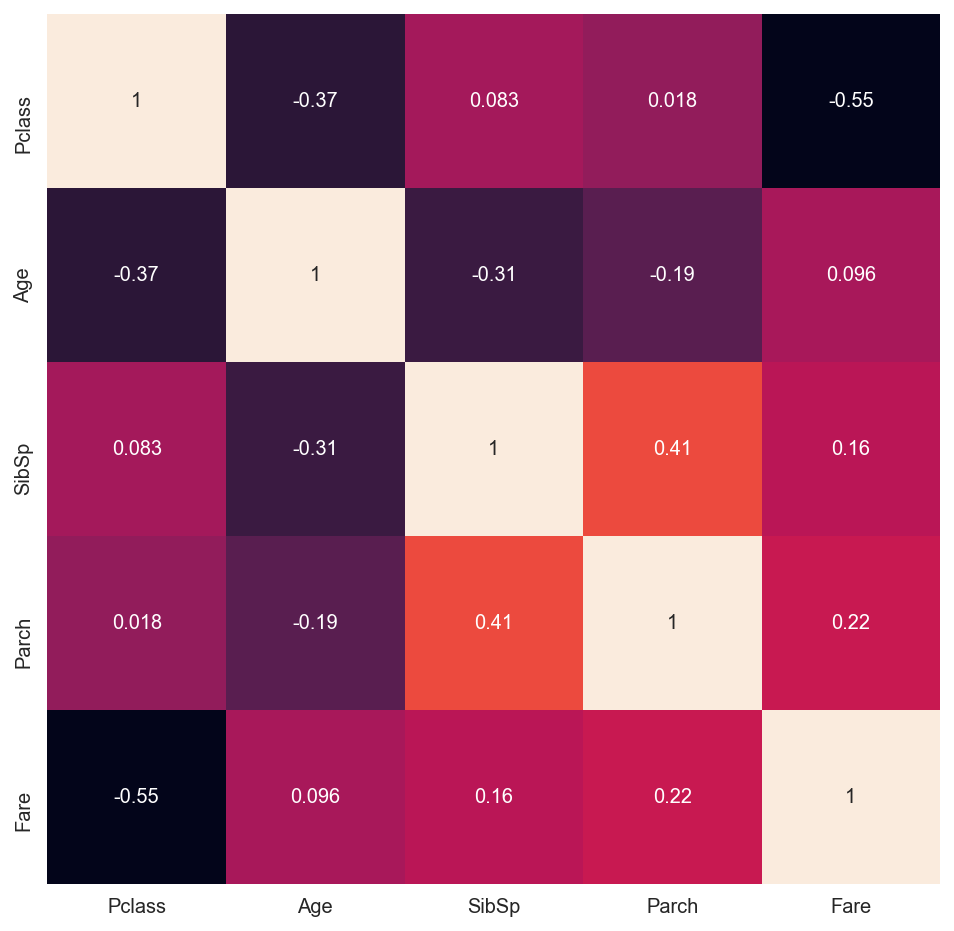

In [11]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_train.iloc[:, :-1].drop(columns=['Sex']).corr(), annot=True, cbar=False)
plt.show()

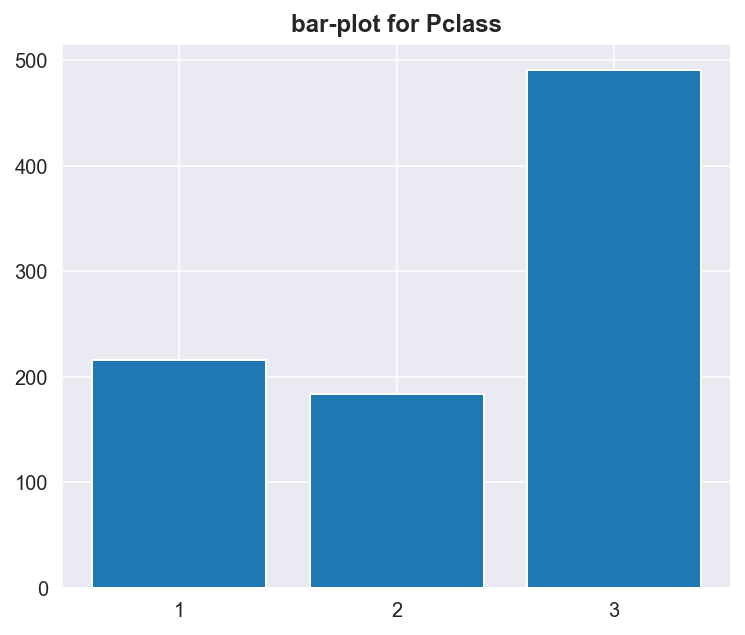

In [10]:
def bar_plt(col_name, figsize=(6, 5), tick_label=None):
    col_vc = df_train[col_name].value_counts().sort_index()
    plt.figure(figsize=figsize)
    plt.bar(col_vc.index, col_vc.values, tick_label=tick_label)
    plt.title(f'bar-plot for {col_name}', fontsize=12, weight='bold')
    plt.show()
bar_plt('Pclass', tick_label=['1', '2', '3'])

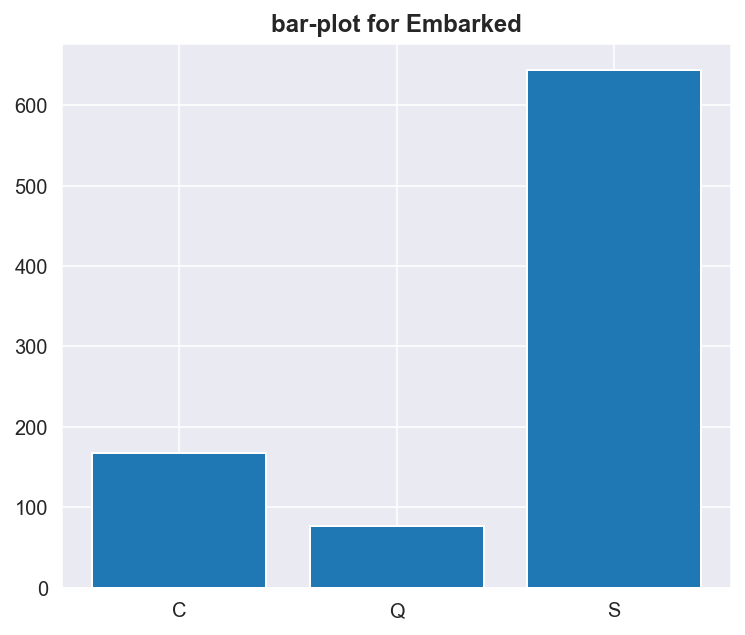

In [11]:
bar_plt('Embarked')

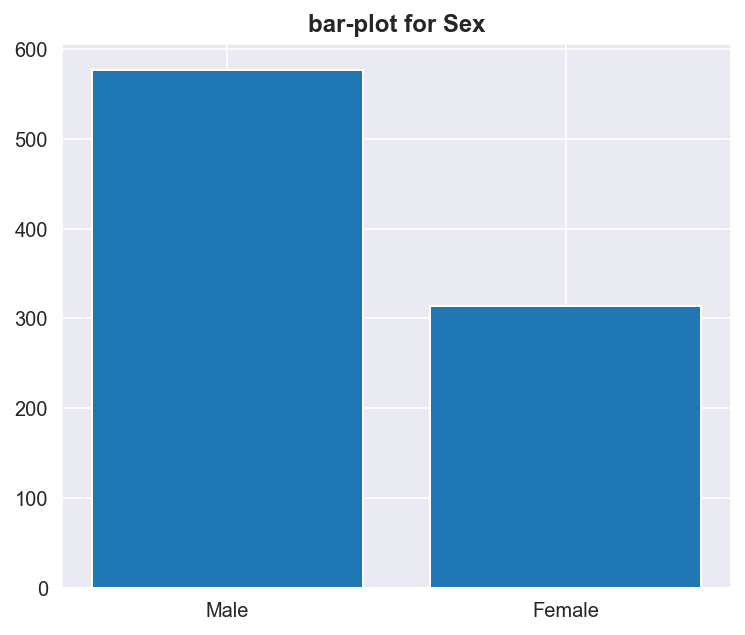

In [13]:
bar_plt('Sex', tick_label=['Male', 'Female'])

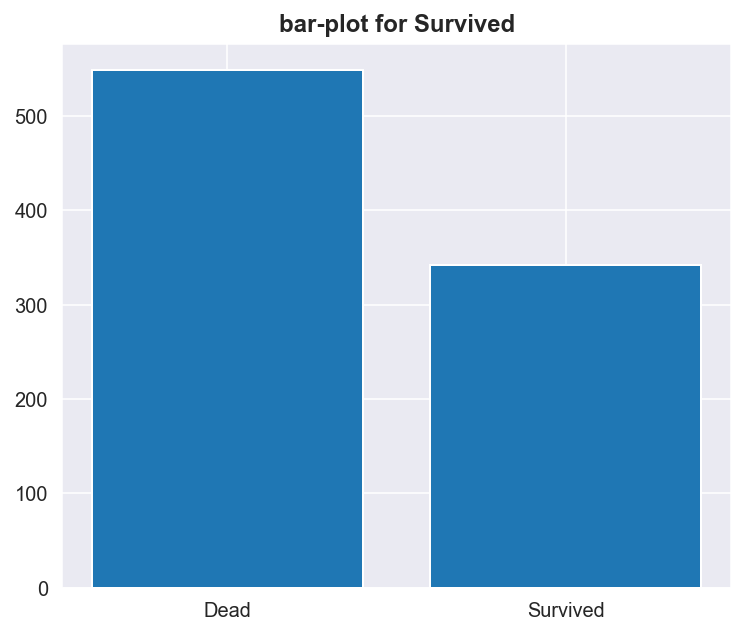

In [14]:
bar_plt('Survived', tick_label=['Dead', 'Survived'])

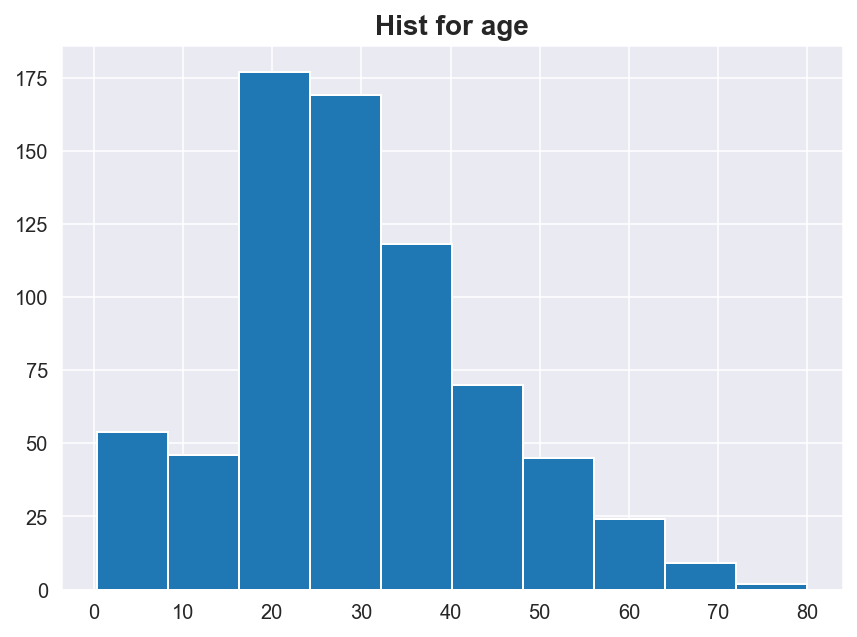

In [15]:
plt.figure(figsize=(7, 5))
df_train['Age'].hist()
plt.title('Hist for age', fontsize=14, weight='bold')
plt.show()

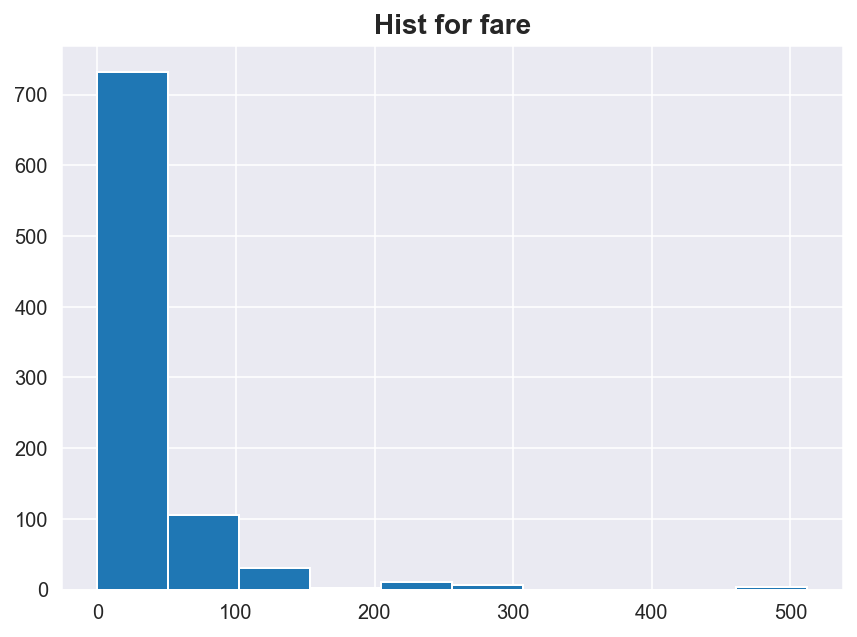

In [16]:
plt.figure(figsize=(7, 5))
df_train['Fare'].hist()
plt.title('Hist for fare', fontsize=14, weight='bold')
plt.show()

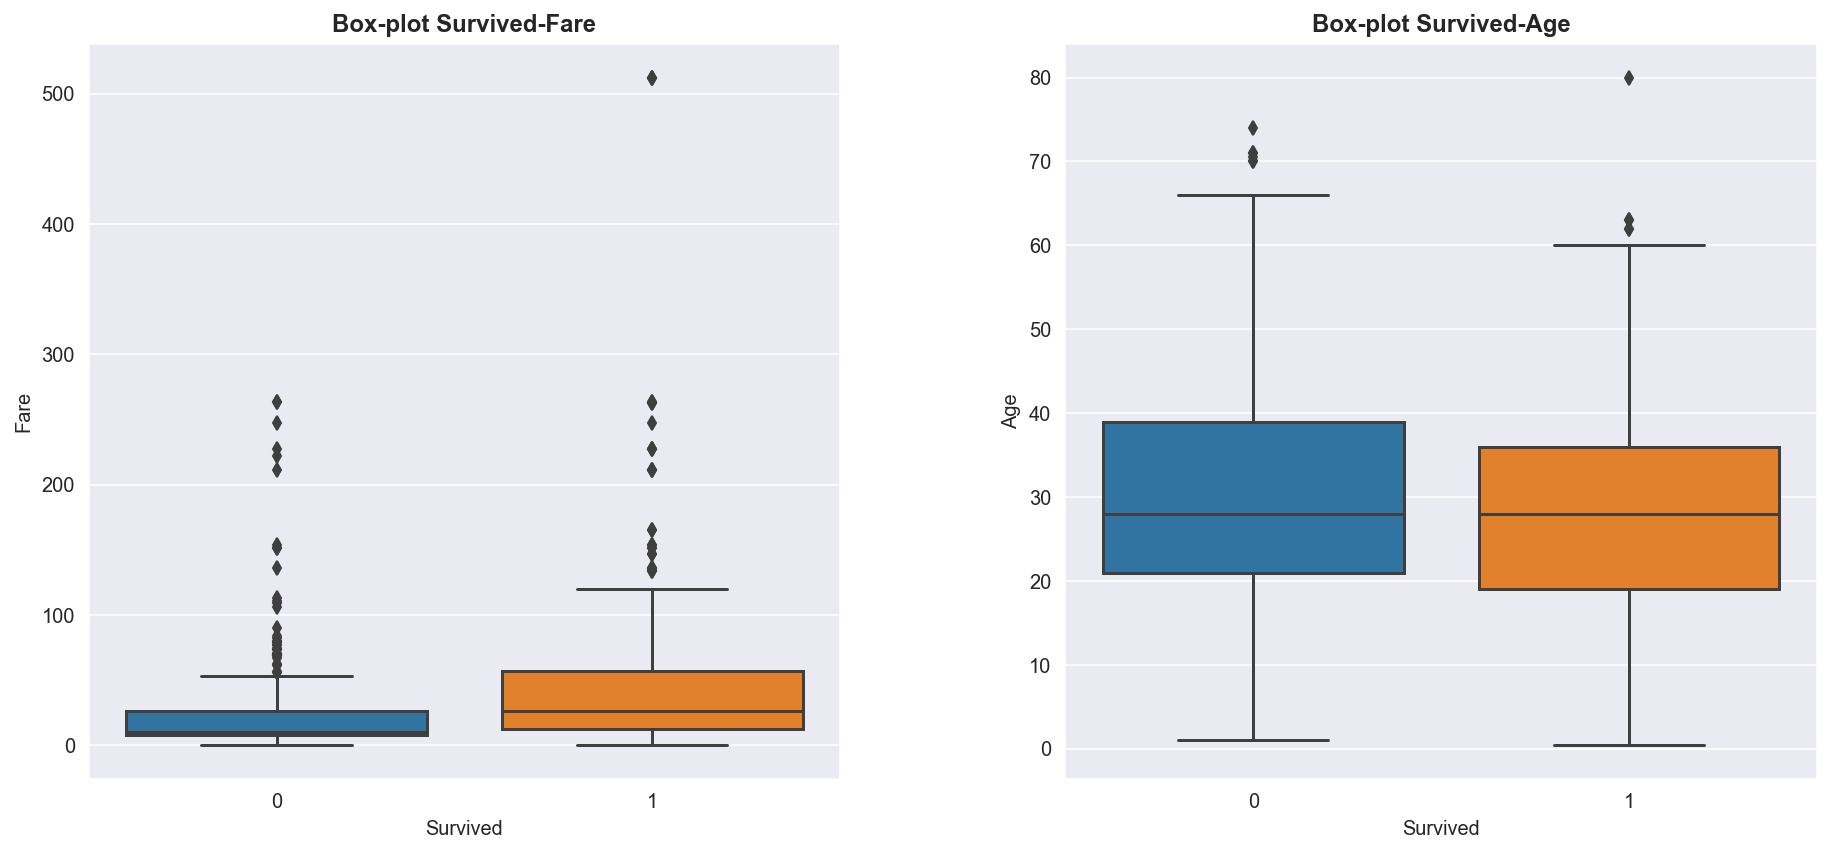

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=df_train, ax=ax[0])
ax[0].set_title('Box-plot Survived-Fare', weight='bold')
sns.boxplot(x='Survived', y='Age', data=df_train, ax=ax[1])
ax[1].set_title('Box-plot Survived-Age', weight='bold')
fig.subplots_adjust(left=0, right=1, bottom=0.1, top=0.95,
                    hspace=0.4, wspace=0.3)
plt.show()

In [18]:
df_train[df_train['Fare'] >= 200].sort_values(by='Fare')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
780,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",1,43.0,0,1,24160,211.3375,B3,S,1
731,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,1
690,1,"Madill, Miss. Georgette Alexandra",1,15.0,0,1,24160,211.3375,B5,S,1
378,1,"Widener, Mr. Harry Elkins",0,27.0,0,2,113503,211.5000,C82,C,0
528,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,S,0
717,1,"Endres, Miss. Caroline Louise",1,38.0,0,0,PC 17757,227.5250,C45,C,1
701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
381,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,NaN,C,1
558,1,"Robbins, Mr. Victor",0,NaN,0,0,PC 17757,227.5250,NaN,C,0


In [19]:
df_train[df_train['Fare'] >= 200]['Survived'].mean()

0.7

In [20]:
df_train.select_dtypes('number').describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [21]:
df_train[df_train['Name'].str.startswith('Fortune')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
28,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0,C23 C25 C27,S,0
89,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0,C23 C25 C27,S,1
342,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0,C23 C25 C27,S,1
439,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0,C23 C25 C27,S,0


In [5]:
any(df_train.apply(lambda x: (x.Name.split()[1] in ('Miss.', 'Mrs.') and x.Sex == 0) or
               (x.Name.split()[1] in ('Mr.', 'Master.') and x.Sex == 1), axis=1))

False

In [12]:
df_mean_surv = df_train.groupby('Ticket').mean()['Survived'] \
.to_frame().rename(columns={'Survived': 'Mean_survived'})

In [13]:
df_mean_surv

,Mean_survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


In [14]:
df_train = df_train.join(df_mean_surv, on='Ticket', how='inner', lsuffix='', rsuffix='_j')
df_train.sort_index(inplace=True)

In [15]:
df_train[df_train['Survived'] == df_train['Mean_survived']]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Mean_survived
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0.0
6,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0.0
888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1,1.0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.0


In [14]:
# s = df_train[df_train['Name'].str.contains('Miss', regex=False)]['Age'].isna()
# df_train.loc[s[s].index]

In [16]:
male_kids_mean = round(df_train[(df_train['Age'] <= 13) 
                          & (df_train['Sex'] == 0)]['Age'].mean(), 1)
male_adult_mean = round(df_train[(df_train['Age'] > 13)
                          & (df_train['Sex'] == 0)]['Age'].mean(), 1)
fem_kids_mean = round(df_train[(df_train['Age'] <= 13) 
                          & (df_train['Sex'] == 1)]['Age'].mean(), 1)
fem_adult_mean = round(df_train[(df_train['Age'] > 13)
                          & (df_train['Sex'] == 1)]['Age'].mean(), 1)

In [17]:
df = df_train.copy()

In [18]:
q1 = df_train[(df_train['Age'].isna()) & (df_train['Sex'] == 0)]['Name'].str.contains('Master', regex=False)
df.loc[q1[q1].index, ['Age']] = male_kids_mean
q2 = df_train[(df_train['Age'] .isna()) & (df_train['Sex'] == 0)]['Name'].str.contains('Mr.', regex=False)
df.loc[q2[q2].index, ['Age']] = male_adult_mean

In [19]:
q3 = df_train[(df_train['Age'].isna()) & (df_train['Sex'] == 1)]['Name'].str.contains('Miss.', regex=False)
df.loc[q3[q3].index, ['Age']] = fem_kids_mean
q4 = df_train[(df_train['Age'] .isna()) & (df_train['Sex'] == 1)]['Name'].str.contains('Mrs.', regex=False)
df.loc[q4[q4].index, ['Age']] = fem_adult_mean

In [20]:
df.loc[767, ['Age']] = male_adult_mean
df.isna().sum()

Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Survived           0
Mean_survived      0
dtype: int64

In [21]:
df = df.reset_index().drop(columns='PassengerId')

In [22]:
# df['Name'].str.split(', ')
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split()[0])

In [23]:
df['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

In [24]:
value_cnt = df['Title'].value_counts()
df['Title'] = df['Title'].apply(lambda x: x if value_cnt.loc[x] > 10 else 'other')
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Mean_survived,Title
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0,Mrs.
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0.5,Mrs.
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0.0,other
887,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1,1.0,Miss.
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,5.3,1,2,W./C. 6607,23.4500,NaN,S,0,0.0,Miss.
889,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,1.0,Mr.


In [25]:
df.isna().sum()

Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Survived           0
Mean_survived      0
Title              0
dtype: int64

In [26]:
# df_test[df_test['Name'].str.contains('Dona')]
value_cnt = value_cnt.append(pd.Series([0], index=['Dona.']))
value_cnt

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Dona.          0
dtype: int64

In [27]:
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(', ')[1].split()[0])
df_test['Title'] = df_test['Title'].apply(lambda x: 
                                          x if value_cnt.loc[x] > 10 else 'other')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,other
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr.


# Train-validation split

In [28]:
from sklearn.model_selection import train_test_split
features = ['Pclass', 'Sex', 'Age', 'SibSp', 
            'Parch', 'Fare', 'Embarked', 'Ticket', 'Title'] # added ticket
X = df[features] #.drop(columns=features)
y = df['Survived']

In [29]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [30]:
list(X_train.select_dtypes([object]).columns) + list(set(X_train.select_dtypes([np.number]).columns) - {'Age', 'Fare'})

['Embarked', 'Ticket', 'Title', 'Sex', 'Pclass', 'Parch', 'SibSp']

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# numeric_features = X_train.select_dtypes([np.number]).columns
# categorical = X_train.select_dtypes([object]).columns

numeric_features = ['Age', 'Fare']
categorical = list(X_train.select_dtypes([object]).columns) + \
                list(set(X_train.select_dtypes([np.number]).columns) - {'Age', 'Fare'})

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

# SVM

In [32]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps=[
     ('transf', column_transformer),
     ('SVM', SVC(C=0.01, kernel='linear'))
 ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

a = pipeline.decision_function(X_val)
P = (a - a.min())/(a.max() - a.min())

precision, recall, thresholds = metrics.precision_recall_curve(y_val, P)
auc_pr = metrics.auc(recall, precision)
acc = metrics.accuracy_score(y_val, y_pred)
print('AUC-PR для дефолтного SVM (с линейным ядром) = {:.2f}'.format(auc_pr))
print('Accuracy для дефолтного SVM (с линейным ядром) = {:.2f}'.format(acc))

AUC-PR для дефолтного SVM (с линейным ядром) = 0.86
Accuracy для дефолтного SVM (с линейным ядром) = 0.79


In [33]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit_transform(X_train['Embarked'].to_numpy().reshape(-1, 1))

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [34]:
X_train_transf = column_transformer.fit_transform(X_train)

In [35]:
print('amount of features before transf:', X_train.shape[1])
print('amount of features after transf:', X_train_transf.shape[1])

amount of features before transf: 9
amount of features after transf: 524


## GridSearch for SVM

In [38]:
from sklearn.model_selection import GridSearchCV

c_set = np.linspace(0.15, 0.8, 40)
# c_set = np.logspace(2, -4, 50)
searcher = GridSearchCV(SVC(kernel='linear'), [{"C": c_set}], 
                        scoring='accuracy', cv=10)

searcher.fit(X_train_transf, y_train)

best_c = searcher.best_params_["C"]
best_score = searcher.best_score_
print("Best C = %.4f" % best_c)
print("Best Accuracy = %.4f" % best_score)

Best C = 0.7000
Best Accuracy = 0.8411


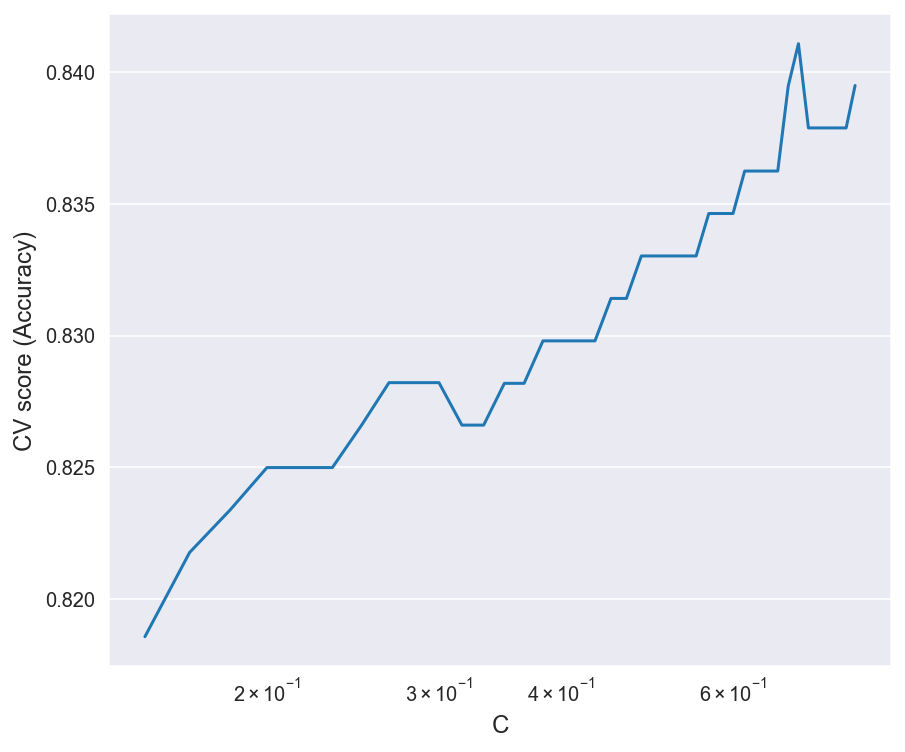

In [39]:
plt.figure(figsize=(7, 6))
plt.plot(c_set, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("С", fontsize=12)
plt.ylabel("CV score (Accuracy)", fontsize=12)
plt.show()

In [40]:
X_val_transf = column_transformer.transform(X_val)
svm_best = SVC(C=best_c, kernel='linear')
svm_best.fit(X_train_transf, y_train)
y_pred_best = svm_best.predict(X_val_transf)

print('CV based SVM accuracy = {:.2f}'.format(metrics.accuracy_score(y_val, y_pred_best)))

CV based SVM accuracy = 0.84


AUC-PR для SVM с C из кросс-валидации = 0.88782
AUC-ROC для SVM с C из кросс-валидации = 0.90434


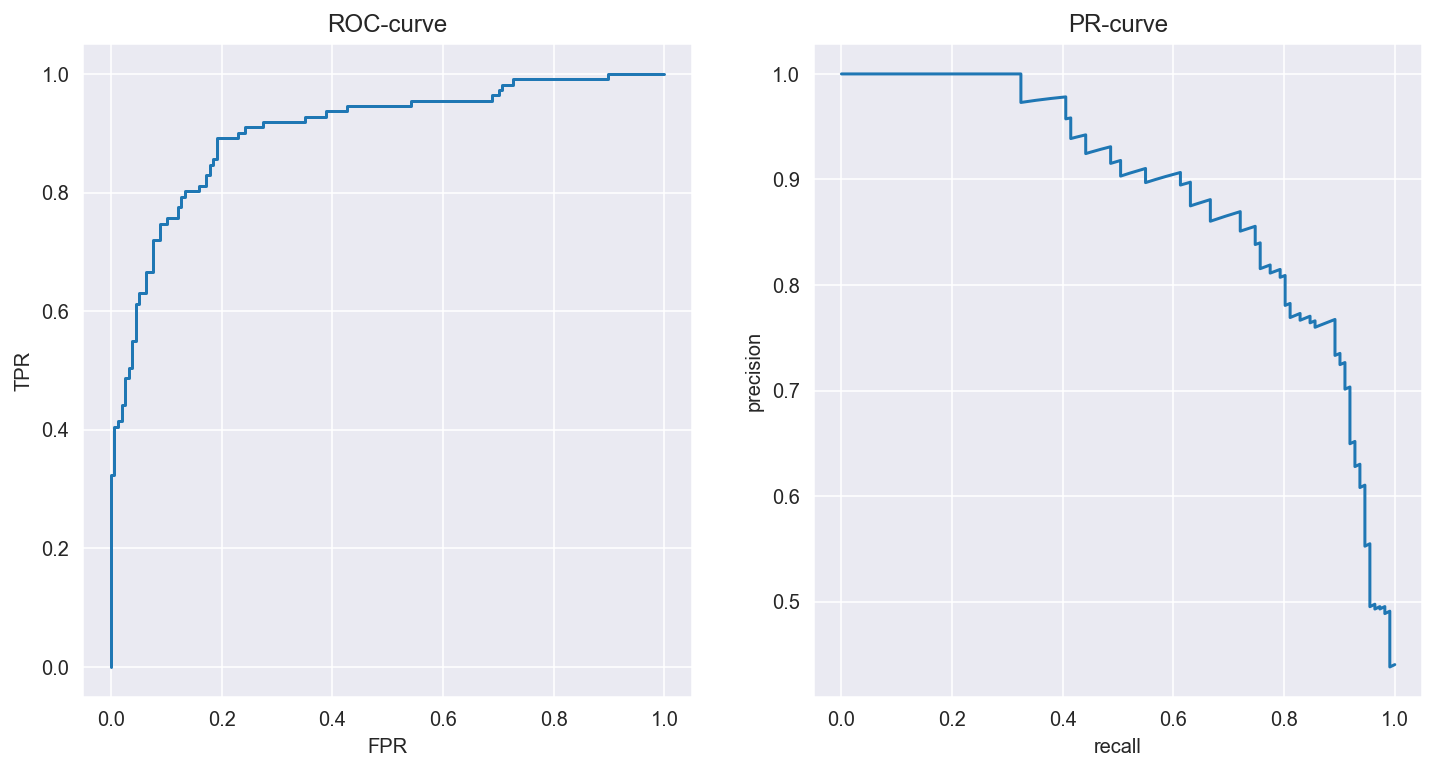

In [41]:
def roc_pr_plot(X_test, y_test, model):
    a = model.decision_function(X_test)
    P = (a - a.min())/(a.max() - a.min())

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, P)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, P)
    print('AUC-PR для SVM с C из кросс-валидации = %.5f' % metrics.auc(recall, precision))
    print('AUC-ROC для SVM с C из кросс-валидации = %.5f' % metrics.auc(fpr, tpr))


    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(fpr, tpr)
    ax[0].set_xlabel('FPR')
    ax[0].set_ylabel('TPR')
    ax[0].set_title('ROC-curve')

    ax[1].plot(recall, precision)
    ax[1].set_xlabel('recall')
    ax[1].set_ylabel('precision')
    ax[1].set_title('PR-curve')
    plt.show()
    
roc_pr_plot(X_val_transf, y_val, svm_best)

## preparing test dataset

In [42]:
prep(df_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [33]:
df_test[df_test['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [56]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


## predicting for test data using SVM model

In [43]:
X_test = df_test[features]
X_test_transf = column_transformer.transform(X_test)
X_test_transf

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.41103686, -0.47093987],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         1.30150543, -0.48720303],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         2.37006771, -0.4344929 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.6959868 , -0.48229976],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.24719064, -0.4666093 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.54799399, -0.18597958]])

In [44]:
predictions = svm_best.predict(X_test_transf)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_svm.csv', index=False)

In [45]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Decision Trees

## default stuff

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

In [47]:
tree.fit(X_train_transf, y_train)
y_pred = tree.predict(X_val_transf)

In [48]:
def print_metrics(model, y_val, X_val, y_pred):
    print('accuracy = {:.5f}'.format(metrics.accuracy_score(y_val, y_pred)))
    print('F1 score = {:.5f}'.format(metrics.f1_score(y_val, y_pred)))

    precision, recall, thresholds = metrics.precision_recall_curve(y_val, 
                                                                   model.predict_proba(X_val)[:, 1])
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    print('AUC-PR = %.5f' % metrics.auc(recall, precision))
    print('AUC-ROC = %.5f' % metrics.auc(fpr, tpr))

print_metrics(tree, y_val, X_val_transf, y_pred)

accuracy = 0.80224
F1 score = 0.73096
AUC-PR = 0.81792
AUC-ROC = 0.78384


## GridSearch for DT

In [66]:
def grid_search(model, X, y, params, scoring='accuracy', nfolds=5):    
    #use gridsearch to test all values
    gscv = GridSearchCV(model, params, scoring=scoring, cv=nfolds, n_jobs=-1)
    #fit model to data
    gscv.fit(X, y)
    print('%.5f' % gscv.best_score_)
    return gscv.best_params_

param_grid = {'criterion':['gini', 'entropy'], 
              'max_depth': np.arange(1, 12), 
              'min_samples_leaf': np.arange(5, 19, 2)}
tree = DecisionTreeClassifier(random_state=42)
best_params_dtree = grid_search(tree, X_train_transf, y_train, param_grid)

0.81701


In [67]:
best_params_dtree

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15}

In [68]:
best_tree = DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6}, 
                                   random_state=42)
best_tree.fit(X_train_transf, y_train)
y_pred = best_tree.predict(X_val_transf)

print_metrics(best_tree, y_val, X_val_transf, y_pred)

accuracy = 0.81343
F1 score = 0.75490
AUC-PR = 0.81782
AUC-ROC = 0.82848


In [51]:
predictions_tree = best_tree.predict(X_test_transf)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_tree})
output.to_csv('submission.csv', index=False)

## Dumb attempts with full train data and implementing MTE

In [69]:
X_transf = column_transformer.transform(X)
tree = DecisionTreeClassifier(random_state=42)
best_params_full_train = grid_search(tree, X_transf, y, param_grid)

0.82378


In [70]:
def mean_target_enc(X, columns, df=df):
    X_copy = X.copy()
    for c in columns:
        d = df.groupby(c).mean()['Survived'].to_dict()
        X_copy[c] = X_copy[c].apply(lambda x: d.get(x, 0.5))
    return X_copy
X_transf1 = mean_target_enc(X, categorical)

In [71]:
X_transf1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Title
0,0.242363,0.188908,22.0,0.535885,0.343658,7.2500,0.339009,0.0,0.156673
1,0.629630,0.742038,38.0,0.535885,0.343658,71.2833,0.553571,1.0,0.792000
2,0.242363,0.742038,26.0,0.345395,0.343658,7.9250,0.339009,1.0,0.697802
3,0.629630,0.742038,35.0,0.535885,0.343658,53.1000,0.339009,0.5,0.792000
4,0.242363,0.188908,35.0,0.345395,0.343658,8.0500,0.339009,0.0,0.156673
...,...,...,...,...,...,...,...,...,...
886,0.472826,0.188908,27.0,0.345395,0.343658,13.0000,0.339009,0.0,0.444444
887,0.629630,0.742038,19.0,0.345395,0.343658,30.0000,0.339009,1.0,0.697802
888,0.242363,0.742038,5.3,0.535885,0.500000,23.4500,0.339009,0.0,0.697802
889,0.629630,0.188908,26.0,0.345395,0.343658,30.0000,0.553571,1.0,0.156673


In [55]:
for col in categorical:
    X_transf1[col] += np.random.normal(loc=0, scale=0.05, size=X_transf1.shape[0])

In [56]:
X_transf1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Title
0,0.259329,0.205496,22.0,0.529404,0.358108,7.2500,0.231746,0.005374,0.190705
1,0.645874,0.747607,38.0,0.541825,0.333185,71.2833,0.525132,1.079611,0.828321
2,0.200153,0.738324,26.0,0.346998,0.340324,7.9250,0.337597,0.966215,0.723527
3,0.604994,0.679494,35.0,0.611366,0.355690,53.1000,0.378102,0.443501,0.794723
4,0.273420,0.128712,35.0,0.342541,0.323687,8.0500,0.330738,-0.061376,0.064752
...,...,...,...,...,...,...,...,...,...
886,0.500322,0.143909,27.0,0.247956,0.299017,13.0000,0.354761,-0.049088,0.450614
887,0.510610,0.750843,19.0,0.344639,0.195601,30.0000,0.336480,0.989552,0.662682
888,0.224596,0.825141,5.3,0.526545,0.548655,23.4500,0.305988,-0.025141,0.700141
889,0.647039,0.128577,26.0,0.325906,0.326124,30.0000,0.640598,0.994277,0.176263


In [72]:
column_transformer_numeric = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),
], remainder='passthrough')
X_transf1 = column_transformer_numeric.fit_transform(X_transf1)

In [73]:
X_transf1

array([[-0.50434874, -0.50244517,  0.24236253, ...,  0.33900929,
         0.        ,  0.15667311],
       [ 0.63603887,  0.78684529,  0.62962963, ...,  0.55357143,
         1.        ,  0.792     ],
       [-0.21925184, -0.48885426,  0.24236253, ...,  0.33900929,
         1.        ,  0.6978022 ],
       ...,
       [-1.69462831, -0.17626324,  0.24236253, ...,  0.33900929,
         0.        ,  0.6978022 ],
       [-0.21925184, -0.04438104,  0.62962963, ...,  0.55357143,
         1.        ,  0.15667311],
       [ 0.20839352, -0.49237783,  0.24236253, ...,  0.38961039,
         0.        ,  0.15667311]])

In [74]:
X_test_transf1 = mean_target_enc(X_test, categorical)
X_test_transf1 = column_transformer_numeric.transform(X_test_transf1)
# for col in categorical:
#     X_test_transf1[col] += np.random.normal(loc=0, scale=0.05, 
#                                             size=X_test_transf1.shape[0])

In [75]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X_transf1, y, test_size=0.3, random_state=123)
tree = DecisionTreeClassifier(random_state=42)
best_params_full_train = grid_search(tree, X_train1, y_train1, param_grid)

0.98879


In [76]:
best_params_full_train

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [77]:
best_tree = DecisionTreeClassifier(**best_params_full_train, random_state=777)
best_tree.fit(X_train1, y_train1)
# best_tree.fit(X_transf1, y)
# y_pred = best_tree.predict(X_val_transf)
y_pred = best_tree.predict(X_val1)
print_metrics(best_tree, y_val1, X_val1, y_pred)

accuracy = 0.98507
F1 score = 0.97959
AUC-PR = 0.99633
AUC-ROC = 0.99778


In [62]:
predictions_tree_full = best_tree.predict(X_test_transf1)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_full})
output.to_csv('submission.csv', index=False)

## Feature selection (Greedy)

In [78]:
def feat_selection(X, y, X_test, y_test, alt_cond=False):
    feat_l = list(range(X.shape[1]))
    metr_l = []
    metr_hist = []
    feat_to_keep = []
    while True:
        for i in feat_l:
            best_tree.fit(X[:, feat_to_keep + [i]], y)
            y_pred = best_tree.predict(X_test[:, feat_to_keep + [i]])
            metr_l.append(metrics.accuracy_score(y_test, y_pred))
    #     print(metr_l)
    #     print(np.argmax(metr_l), max(metr_l))
        feat_to_keep.append(feat_l[np.argmax(metr_l)])
        feat_l.remove(feat_l[np.argmax(metr_l)])    
        metr_hist.append(max(metr_l))
        if not alt_cond:
            if len(metr_hist) > 2:
                if (metr_hist[-1] <= metr_hist[-2] and metr_hist[-2] <= metr_hist[-3]) or len(feat_l) == 0:
                    break
        else:
            if len(metr_hist) > 15:
                if all([x == metr_hist[-15] for x in metr_hist[-15::]]) or len(feat_l) == 0:
                    break
        metr_l = []
        print(metr_hist[-1])
    print(metr_hist)    
    return sorted(feat_to_keep)
feat_to_keep = feat_selection(X_train1, y_train1, X_val1, y_val1)

0.9253731343283582
0.9850746268656716
0.9850746268656716
[0.9253731343283582, 0.9850746268656716, 0.9850746268656716, 0.9850746268656716]


In [80]:
best_tree.fit(X_train1[:, feat_to_keep], y_train1)
y_pred = best_tree.predict(X_val1[:, feat_to_keep])
print_metrics(best_tree, y_val1, X_val1[:, feat_to_keep], y_pred)

accuracy = 0.98507
F1 score = 0.97959
AUC-PR = 0.99633
AUC-ROC = 0.99778


In [115]:
predictions_tree_select_mte = best_tree.predict(X_test_transf1[:, feat_to_keep])
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_select_mte})
output.to_csv('submission.csv', index=False)

In [81]:
feat_to_keep1 = feat_selection(X_train_transf, y_train, X_val_transf, y_val, alt_cond=True)

0.7910447761194029
0.8097014925373134
0.8208955223880597
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
[0.7910447761194029, 0.8097014925373134, 0.8208955223880597, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418]


In [82]:
feat_to_keep1

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 62, 500, 518, 519]

In [87]:
best_tree = DecisionTreeClassifier(**{'criterion': 'gini', 
                                      'max_depth': 11, 'min_samples_leaf': 6}, random_state=42)
best_tree.fit(X_train_transf[:, feat_to_keep1], y_train)
y_pred = best_tree.predict(X_val_transf[:, feat_to_keep1])
print_metrics(best_tree, y_val, X_val_transf[:, feat_to_keep1], y_pred)

accuracy = 0.82463
F1 score = 0.78924
AUC-PR = 0.71468
AUC-ROC = 0.81615


In [68]:
predictions_tree_select = best_tree.predict(X_test_transf[:, feat_to_keep1])
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_select})
output.to_csv('submission.csv', index=False)

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rfc = {"n_estimators": [100, 200, 500],
              "max_depth": range(1, 11, 2),
              'criterion': ["gini", "entropy"],
              "min_samples_leaf": range(5, 12, 2),
              "max_features": ["sqrt", "log2"],
              'oob_score': [True, False]
             }

In [90]:
X_train_transf.shape

(623, 524)

In [91]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
# rfc.fit(X_train_transf, y_train)
# y_pred = rfc.predict(X_val_transf)
# print_metrics(rfc, y_val, X_val_transf, y_pred)
best_params_rfc = grid_search(rfc, X_train1, 
                                y_train1, param_grid_rfc)

0.98716


In [92]:
best_params_rfc

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 9,
 'n_estimators': 500,
 'oob_score': True}

In [93]:
best_rfc = RandomForestClassifier(**{'criterion': 'gini',
                                     'max_depth': 9,
                                     'max_features': 'sqrt',
                                     'min_samples_leaf': 9,
                                     'n_estimators': 500,
                                     'oob_score': True}, random_state=42)
best_rfc.fit(X_train1, y_train1)
y_pred = best_rfc.predict(X_val1)
print_metrics(best_rfc, y_val1, X_val1, y_pred)

accuracy = 0.98881
F1 score = 0.98492
AUC-PR = 0.99747
AUC-ROC = 0.99862


In [101]:
predictions_rf_mte = best_rfc.predict(X_test_transf1)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_rf})
output.to_csv('submission.csv', index=False)

In [96]:
predictions_rf_mte = best_rfc.predict(X_test_transf1)
(predictions_rf_mte == predictions).mean()

0.8779904306220095